In [79]:
import random
import string
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn import preprocessing, model_selection
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.callbacks import ModelCheckpoint
import numpy as np


import os
import nltk
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer


from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)


1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_5
https://keras.io/examples/structured_data/imbalanced_classification/

In [80]:
data = pd.read_csv("dataset_lab1.csv")

In [82]:
data.head()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Proto_icmp,...,State_SA_R,State_SPA_FSPA,State_SPA_SPA,State_SPA_SRPA,State_SRA_SA,State_SRPA_FSPA,State_SRPA_SPA,State_SR_SA,State_S_RA,State_S_SA
0,0.069790,13363,57021,0.0,0.0,2,120,60,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.306928,2163,443,0.0,0.0,6,366,186,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.000186,46350,53,0.0,0.0,2,214,81,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.723129,49618,80,0.0,0.0,8,492,246,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.175398,1278,53,0.0,0.0,2,438,87,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y = data['Label']
data = data.drop(columns=['Label'])
X_data = data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data,y, train_size=0.8, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

In [84]:
X_data.shape

(64808, 33)

In [85]:
y.shape

(64808,)

In [87]:
model = keras.Sequential(
    [
        layers.Dense(16, activation='relu', input_shape=(33,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                544       
                                                                 
 dense_16 (Dense)            (None, 64)                1088      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1697 (6.63 KB)
Trainable params: 1697 (6.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
X_train_scaled.shape

(51846, 33)

In [45]:
y_train.shape

(51846,)

In [46]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


1297/1297 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9542 - val_loss: 0.0591 - val_accuracy: 0.9723
Epoch 2/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9689 - val_loss: 0.0570 - val_accuracy: 0.9719
Epoch 3/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9734 - val_loss: 0.0515 - val_accuracy: 0.9876
Epoch 4/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9767 - val_loss: 0.0510 - val_accuracy: 0.9789
Epoch 5/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9809 - val_loss: 0.0515 - val_accuracy: 0.9794
Epoch 6/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9824 - val_loss: 0.0458 - val_accuracy: 0.9866
Epoch 7/10
1297/1297 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9831 - val_loss: 0.0423 - val_accuracy: 0.9876
Epo

In [47]:
predicted_val_var = model.predict(X_test_scaled)

predicted_val_var = [0 if y < 0.5 else 1 for y in predicted_val_var] #


print("classification matrix: ", classification_report(y_test, predicted_val_var))
print("confusion matrix: ", confusion_matrix(y_test, predicted_val_var))

406/406 [==============================] - 1s 1ms/step
classification matrix:                precision    recall  f1-score   support

           0       0.99      0.98      0.98      6463
           1       0.98      0.99      0.99      6499

    accuracy                           0.99     12962
   macro avg       0.99      0.99      0.99     12962
weighted avg       0.99      0.99      0.99     12962

confusion matrix:  [[6328  135]
 [  59 6440]]


2. Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).
Приклади: 
https://github.com/natsakh/Data-Analysis/tree/main/Pr_6
https://keras.io/examples/vision/image_classification_from_scratch/
https://keras.io/examples/vision/mnist_convnet/

In [48]:
cat_data = pd.read_csv("cat_images.txt")
print(cat_data.columns)
cat_data.head()

Index(['Label', 'Latin', ' Common Name                   ', ' Train Images ',
       ' Validation Images'],
      dtype='object')


,Label,Latin,Common Name,Train Images,Validation Images
0,a0,pecora,ram,132,26
1,a1,gatoo,cat,132,26
2,a2,cane,dog,132,26


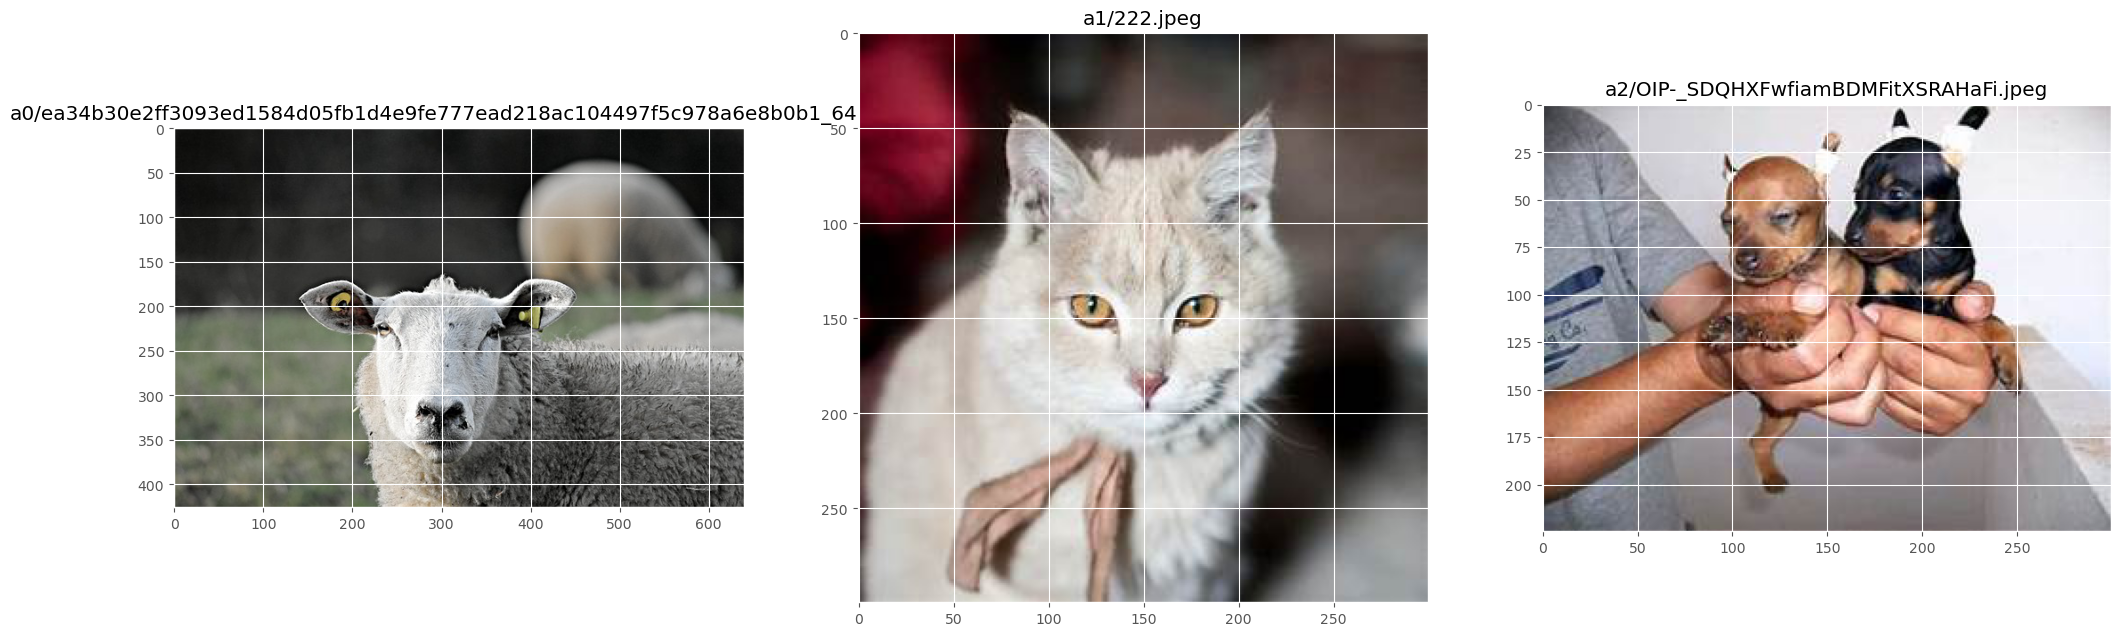

In [88]:
classes = ['a0', 'a1', 'a2'] #список класів
metadata = cat_data.loc[cat_data['Label'].isin(classes)]


train_dir_to_find = "archive(18)/train"
test_dir_to_find = "archive(18)/valid"

i = 0
figures, axes = plt.subplots(1, 3, figsize=(25, 15))
for label in metadata.Label:
    random_img_check = random.choice(os.listdir(f"{os.curdir}/{train_dir_to_find}/{label}"))



    image = plt.imread(f"{train_dir_to_find}/{label}/{random_img_check}")
    axes[i].imshow(image)
    axes[i].set_title(f"{label}/{random_img_check}")
    i += 1

In [50]:
train_data_generator_variable = ImageDataGenerator(
    rescale=1./255,
)
train_data_generator = train_data_generator_variable.flow_from_directory(directory = train_dir_to_find, classes = classes, target_size = (150,150))

test_data_generator_variable = ImageDataGenerator(
    rescale=1./255,
)
test_data_generator = test_data_generator_variable.flow_from_directory(directory = test_dir_to_find, classes = classes, target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Found 396 images belonging to 3 classes.


Found 78 images belonging to 3 classes.


In [51]:
model = keras.models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size=(3,3), input_shape=(150,150,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters = 64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

epochs = 15
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)       

In [52]:
history = model.fit(x=train_data_generator, steps_per_epoch=len(train_data_generator), validation_data=test_data_generator, validation_steps=len(test_data_generator), epochs=epochs)

Epoch 1/15
13/13 [==============================] - 4s 271ms/step - loss: 1.4519 - accuracy: 0.3485 - val_loss: 1.0841 - val_accuracy: 0.3333
Epoch 2/15
13/13 [==============================] - 4s 287ms/step - loss: 1.0284 - accuracy: 0.4192 - val_loss: 1.0029 - val_accuracy: 0.5513
Epoch 3/15
13/13 [==============================] - 4s 272ms/step - loss: 0.8789 - accuracy: 0.5783 - val_loss: 0.9237 - val_accuracy: 0.5385
Epoch 4/15
13/13 [==============================] - 4s 285ms/step - loss: 0.8043 - accuracy: 0.5985 - val_loss: 0.9845 - val_accuracy: 0.5769
Epoch 5/15
13/13 [==============================] - 4s 264ms/step - loss: 0.7648 - accuracy: 0.6540 - val_loss: 0.9433 - val_accuracy: 0.5897
Epoch 6/15
13/13 [==============================] - 4s 281ms/step - loss: 0.6756 - accuracy: 0.6995 - val_loss: 0.9893 - val_accuracy: 0.5385
Epoch 7/15
13/13 [==============================] - 4s 306ms/step - loss: 0.5858 - accuracy: 0.7374 - val_loss: 0.9087 - val_accuracy: 0.6026
Epoch 

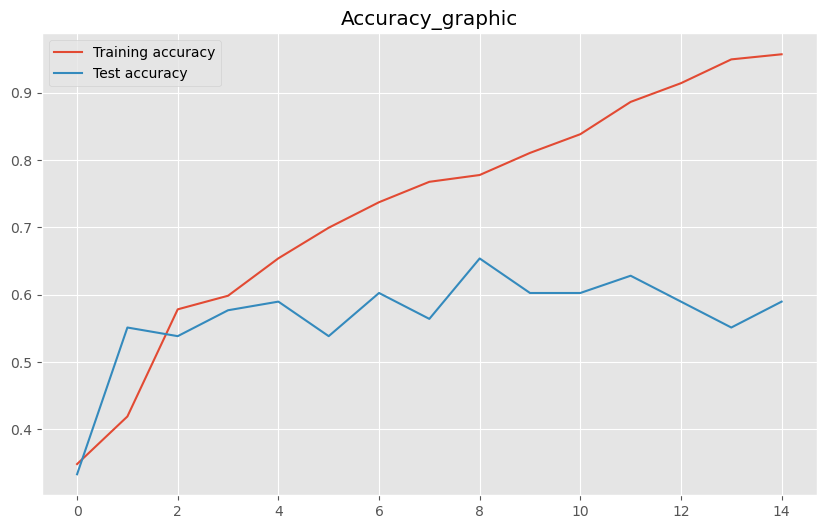

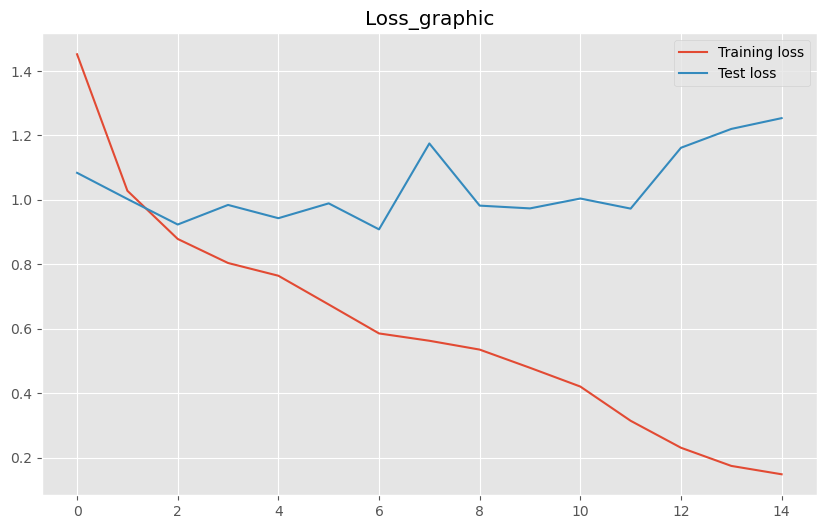

In [65]:
epochs = np.arange(epochs)

plt.figure(figsize=(10,6))
plt.title('Accuracy_graphic')
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.title('Loss_graphic')
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_7
https://keras.io/examples/nlp/text_classification_from_scratch/
https://keras.io/examples/nlp/bidirectional_lstm_imdb/
https://keras.io/examples/nlp/pretrained_word_embeddings/
* у деяких прикладах, з наведених вище, вирішується задача класифікації текстів за допомогою згорткових мереж, але вони можуть бути використані як приклад препроцесінга

In [66]:
texts_data = pd.read_csv("dataset_lab2_cleaned.csv")

In [67]:
texts_data.head()

,rating,reviewText
0,5,This book first bookmobile book I bought I sch...
1,1,When I read description book I couldnt wait re...
2,5,I edit review This book I believe I got right ...
3,5,I dont normally buy mystery novel I dont like ...
4,5,This isnt kind book I normally read although I...


In [92]:
tokenizer_object = Tokenizer(num_words=20000)

In [93]:
tokenizer_object.fit_on_texts(texts_data.reviewText)

In [94]:
x = tokenizer_object.texts_to_sequences(texts_data.reviewText)
x = pad_sequences(x, maxlen=50)
y = np.array([0  if r == 1 else 1 for r in texts_data.rating])

In [95]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

In [96]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=20000, output_dim=32, input_length=50))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.LSTM(units=32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            640000    
                                                                 
 lstm_4 (LSTM)               (None, 50, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 656673 (2.51 MB)
Trainable params: 656673 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


checkpoint = ModelCheckpoint("texts", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/5
 98/100 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.7274
Epoch 1: val_accuracy improved from -inf to 0.90125, saving model to texts
INFO:tensorflow:Assets written to: texts\assets


INFO:tensorflow:Assets written to: texts\assets


100/100 [==============================] - 11s 82ms/step - loss: 0.5041 - accuracy: 0.7300 - val_loss: 0.2572 - val_accuracy: 0.9013
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9516
Epoch 2: val_accuracy improved from 0.90125 to 0.91500, saving model to texts
INFO:tensorflow:Assets written to: texts\assets


INFO:tensorflow:Assets written to: texts\assets


100/100 [==============================] - 7s 73ms/step - loss: 0.1413 - accuracy: 0.9516 - val_loss: 0.2110 - val_accuracy: 0.9150
Epoch 3/5
 98/100 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9882
Epoch 3: val_accuracy did not improve from 0.91500
100/100 [==============================] - 3s 25ms/step - loss: 0.0468 - accuracy: 0.9881 - val_loss: 0.2661 - val_accuracy: 0.9100
Epoch 4/5
 98/100 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9952
Epoch 4: val_accuracy did not improve from 0.91500
100/100 [==============================] - 3s 26ms/step - loss: 0.0201 - accuracy: 0.9950 - val_loss: 0.2894 - val_accuracy: 0.9087
Epoch 5/5
100/100 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9972
Epoch 5: val_accuracy did not improve from 0.91500
100/100 [==============================] - 2s 25ms/step - loss: 0.0118 - accuracy: 0.9972 - val_loss: 0.3126 - val_accuracy: 0.9075


In [98]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 8ms/step - loss: 0.2812 - accuracy: 0.9180


[0.2811960279941559, 0.9179999828338623]

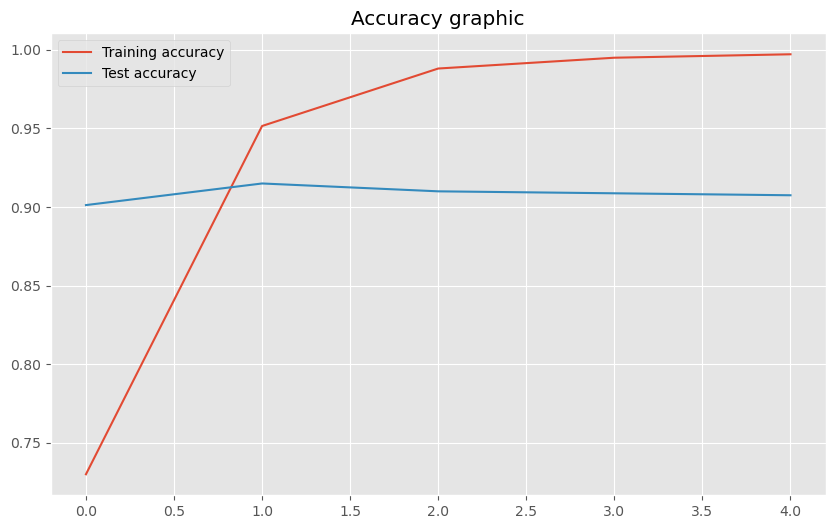

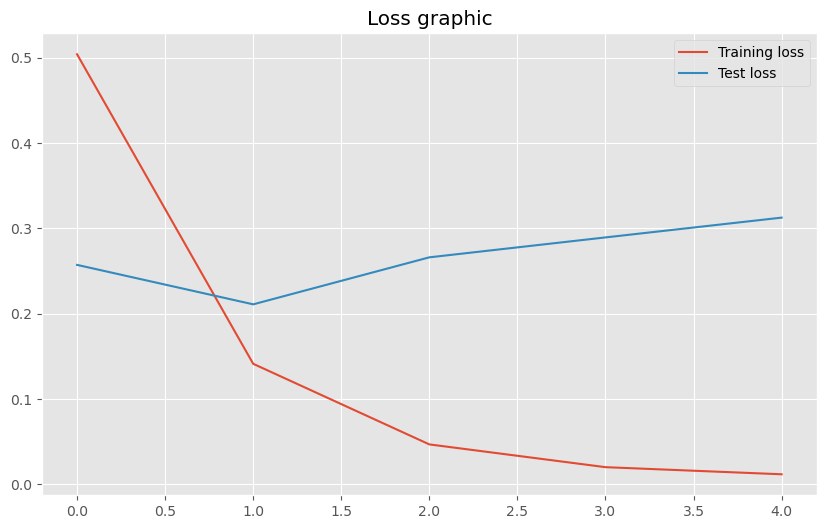

In [99]:
epochs = np.arange(5)

plt.figure(figsize=(10,6))
plt.title('Accuracy graphic')
plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.title('Loss graphic')
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Test loss')
plt.legend()

plt.show()